## 한글 폰트 설치

In [2]:
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 32 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

## load dataset

In [3]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용
df_LCOCT = pd.read_csv("fruitstore_saleshistory.csv")
df_LCOCT[:5]

,공급일자,요일,공급월,공급주차,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,주소-구,주소-동,성별,연령,연령대,구매금액,구매매장,반품_원거래일자,구매시각
0,2018-01-02,화,1,1,272369856,정상회원,과실,과일,사과,사과/유(1.5kg),1.0,수지구,풍덕천동,여,45.0,40대,22207,매장C,NaN,10:04
1,2018-01-02,화,1,1,1506656256,정상회원,채소,버섯,느타리버섯,느타리버섯(300g),1.0,수지구,풍덕천동,여,36.0,30대이하,4977,매장C,NaN,10:05
2,2018-01-02,화,1,1,1506656256,정상회원,축산물,알,유정란,유정란/매장용(10알/국내산),1.0,수지구,풍덕천동,여,36.0,30대이하,7083,매장C,NaN,10:05
3,2018-01-02,화,1,1,1023108864,정상회원,반찬,두부/유부,두부,연두부(100g),1.0,수지구,풍덕천동,여,36.0,30대이하,766,매장C,NaN,10:08
4,2018-01-02,화,1,1,1476143616,정상회원,간식,빵,"식빵, 식사대용",아침빵(240g/8개)/매장,1.0,수지구,풍덕천동,여,34.0,30대이하,4403,매장C,NaN,10:09


## 정규분포 확인 : 연속형

### 음료 종류 확인 (차가운 음료, 따뜻한 음료 구별 위해)



In [4]:
df_drinks = df_LCOCT[df_LCOCT['물품대분류'] == '음료']

drink_names = df_drinks['물품명'].unique()
drink_names

array(['상큼한감귤&한라봉(125ml*3개)', '사과당근즙(150ml)', '옥수수차(500g)',
       '검은콩두유(160ml*5봉)', '과일푸딩(감귤:110g)', '오미자음료(150ml/1봉)',
       '과일푸딩(딸기:110g)', '배즙(120ml/1봉-매장용)', '두유(160ml*5봉)',
       '상큼한감귤&채소(125ml*3개)', '과일푸딩(포도:110g)', '얼음식혜(1000ml/서정)',
       '유기농순한발아보리차(10g*18봉)', '상큼한감귤(125ml*3개)', '녹차티백(1.2g*100티백)',
       '유기보리차(500g)', '모과차(460g)', '사과당근즙(150ml*10개)', '메밀차(200g)',
       '어린이주스(150ml)', '마.율무차(20g*12봉)', '포도즙(팩:120ml*20봉)',
       '건구기자/유(300g)', '오미자음료(150ml*10봉)', '유자차(1kg)', '금산오미자원액(700ml)',
       '우엉차(70g)', '배즙(1상자:120ml*30봉)', '감귤즙(150ml)', '자색양파즙(120ml*20봉)',
       '사과즙(매장/한울:180ml)', '둥굴레차(1.2g*20티백)', '가시복분자즙(100ml/1봉)',
       '상큼한포도(120ml)', '생강차(460g)', '둥굴레차(300g)', '발효황차(30g)',
       '국화차(0.6g*20티백)', '양파즙(120ml*20봉)', '생맥차(150ml)',
       '오미자꽁꽁(120ml/매장용)', '수정과(1000ml/동상면)', '돼지감자차(70g)',
       '가시복분자즙(100ml*10봉)', '딸기꽁꽁(120ml)/매장용', '허브혼합차(15g)', '현미차(500g)',
       '로즈마리(15g)', '아로니아즙(720ml)', '볶은홍화씨(400g)', '마.율무차(300g)',
       '포도즙(180ml*1병:매

#### 음료가 아닌 젤리는 제외시키고 판매량 확인

In [6]:
df_LCOCT = df_LCOCT.dropna(subset=['물품대분류', '공급일자', '구매수량', '물품명'])

df_drinks = df_LCOCT[(df_LCOCT['물품대분류'] == '음료') & (~df_LCOCT['물품명'].str.contains('젤리'))]

df_LCOCT_pivot_table = pd.pivot_table(df_drinks, values='구매수량', index='공급일자', columns='물품명', aggfunc='sum')

df_LCOCT_pivot_table = df_LCOCT_pivot_table.fillna(0)

df_LCOCT_pivot_table[:3]

물품명,가시복분자원액(병:700ml),가시복분자즙(100ml*10봉),가시복분자즙(100ml*20봉),가시복분자즙(100ml/1봉),감귤꽁꽁(120ml)/매장용,감귤즙(150ml),감귤즙(150ml*10개),감귤즙(620ml),감귤즙(유기/150ml),감귤즙(유기/150ml*10봉),...,포도즙(팩:120ml*20봉),한울사과즙(120ml),한울사과즙(120ml*20봉),허브차모음,허브혼합차(15g),현미수국차(1.5g*20티백),현미차(500g),호박즙(80ml*30봉),호박즙(80ml:1봉 매장용),혼합차모음(3병)
공급일자,,,,,,,,,,,,,,,,,,,,,
2018-01-02,0.0,2.0,0.0,3.0,0.0,1.0,0.0,1.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0
2018-01-03,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.1,0.0,0.0,0.0,0.0,0.0,5.0,1.0,6.0,0.0
2018-01-04,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0


#### 차가운 음료 / 따뜻한 음료 기준점
- "차"는 보통 따뜻하게 먹으므로 "차"를 따뜻한 음료로 정함
- 그 외에 나머지는 차가운 음료로 정함

#### '음료온도' 컬럼 생성

In [7]:
df_drinks_copy = df_drinks.copy()

df_drinks_copy.loc[:, '음료온도'] = df_drinks_copy['물품중분류'].apply(lambda x: '따뜻한 음료' if '차' in x else '차가운 음료')

df_LCOCT['음료온도'] = df_LCOCT['물품중분류'].apply(lambda x: '따뜻한 음료' if '차' in x else '차가운 음료')

df_LCOCT.columns

Index(['공급일자', '요일', '공급월', '공급주차', '회원번호', '조합원상태', '물품대분류', '물품중분류', '물품소분류',
       '물품명', '구매수량', '주소-구', '주소-동', '성별', '연령', '연령대', '구매금액', '구매매장',
       '반품_원거래일자', '구매시각', '음료온도'],
      dtype='object')

### 기온 기준 (임의로 정함)
- 데이터가 2018년 01월 ~ 2018년 6월 까지 이므로 이 안에서 기준을 세움
  + 1 ~ 2월 : 추움 / 3 ~ 5월 : 선선함 / 6월 : 더움

#### '기온' 컬럼 생성

In [8]:
df_LCOCT['공급일자'] = pd.to_datetime(df_LCOCT['공급일자'])

df_LCOCT['월'] = df_LCOCT['공급일자'].dt.month

df_LCOCT['기온'] = df_LCOCT['월'].apply(lambda x: '추움' if x <= 2 else ('선선함' if x <= 5 else '더움'))

df_LCOCT.columns

Index(['공급일자', '요일', '공급월', '공급주차', '회원번호', '조합원상태', '물품대분류', '물품중분류', '물품소분류',
       '물품명', '구매수량', '주소-구', '주소-동', '성별', '연령', '연령대', '구매금액', '구매매장',
       '반품_원거래일자', '구매시각', '음료온도', '월', '기온'],
      dtype='object')

## 기온과 음료온도의 상관관계 시각화
- Q : 평균 일일 온도(X)가 차가운 음료와 따뜻한 음료의 총 판매량(Y)에 미치는 영향을 미치나요?

In [9]:
sales_by_temp = df_LCOCT.groupby(['음료온도', '기온']).size().reset_index(name='판매량')

### 차가운 음료 판매량이 압도적으로 많아서 따로 비교

#### 기온별 차가운 음료 판매량 비교

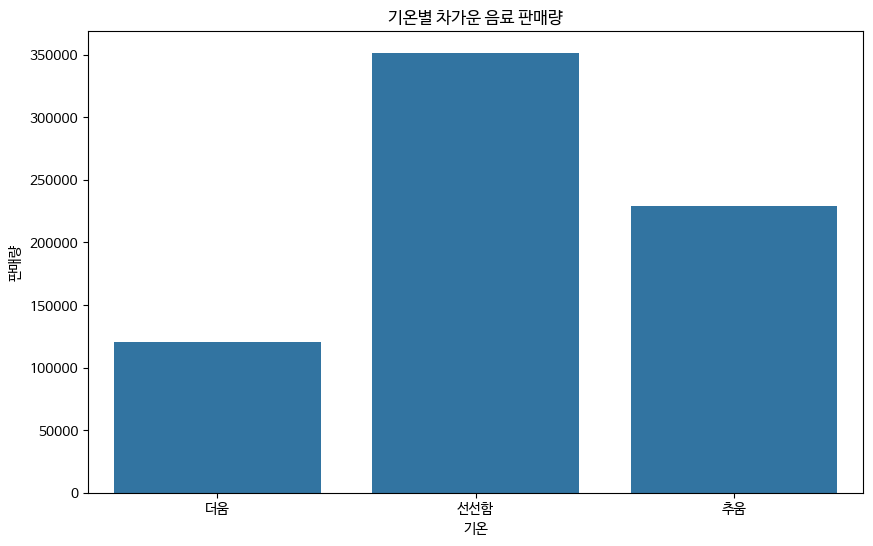

In [10]:
cold_drinks_sales = sales_by_temp[sales_by_temp['음료온도'] == '차가운 음료']

plt.figure(figsize=(10, 6))
sns.barplot(x='기온', y='판매량', data=cold_drinks_sales, errorbar=None)
plt.title('기온별 차가운 음료 판매량')
plt.show()

#### 기온별 따뜻한 음료 판매량 비교

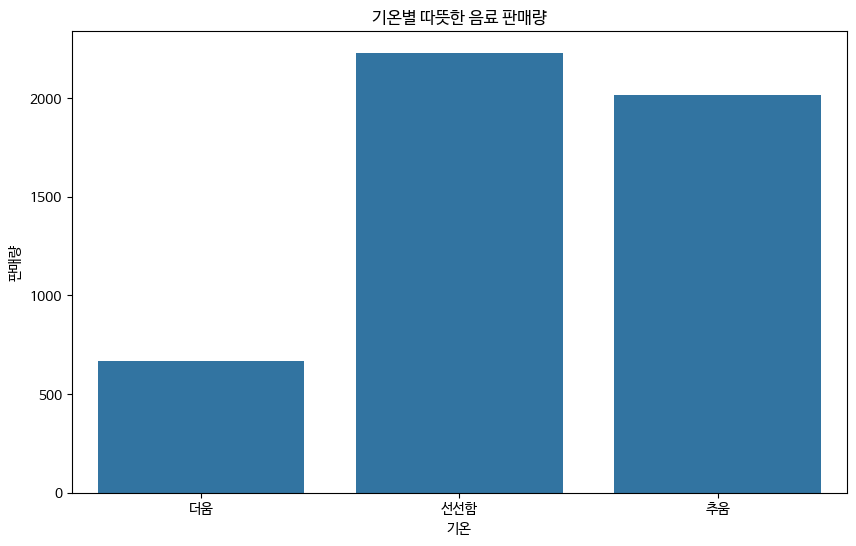

In [11]:
hot_drinks_sales = sales_by_temp[sales_by_temp['음료온도'] == '따뜻한 음료']

plt.figure(figsize=(10, 6))
sns.barplot(x='기온', y='판매량', data=hot_drinks_sales, errorbar=None)
plt.title('기온별 따뜻한 음료 판매량')
plt.show()

## 분석 결과 :
### 차가운 음료의 판매량은 기온에 상관없이 일정한 양상을 보이는 반면,
### 기온이 낮아질수록 따뜻한 음료의 판매량이 증가하는 경향을 나타낸다.
### 이로써, 기온은 따뜻한 음료의 판매량에 중요한 영향을 미친다는
### 결론을 도출할 수 있다.

  1. 차가운 음료는 보편적으로 먹는 다양한 음료들이 있어 어느 날씨든 관계가 없이 잘 팔린다.

  2. 따뜻한 음료는 역시나 선선하거나 추울때가 더운날 보다 훨신 잘팔렸다.
  

